<a href="https://colab.research.google.com/github/hannbi/2025ML-CV/blob/main/ML_HW2_hanbi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 규제항 포함 선형회귀
## 릿지와 라쏘 방법 차이 알아보기

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score # 사이킷런 회귀 성능평가
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [ ]:
dataset=pd.read_csv('BostonHousing.csv')
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
x=dataset.drop('medv',axis=1) # 피처(x)는 집값인 medv의 열을 제외한 나머지
y=dataset['medv'] # 집값인 medv는 타겟(y)

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42) # train_test_split( ) 함수 default 설정

In [ ]:
scaler=StandardScaler()
# 피처 값 데이터 스케일 정규화
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
alphas=[0.001, 0.01, 0.1, 1, 10, 100] # alpha값
results=[]

# 규제x 선형 회귀
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
train_score=r2_score(y_train,lr.predict(x_train_scaled))
test_score=r2_score(y_test,lr.predict(x_test_scaled))
results.append(['LinearRegression',"None",train_score,test_score]) # results에 2차원 리스트로 저장

In [ ]:
# Ridge 회귀
for alpha in alphas:
  ridge=Ridge(alpha=alpha)
  ridge.fit(x_train_scaled,y_train)
  train_r2=r2_score(y_train,ridge.predict(x_train_scaled))
  test_r2=r2_score(y_test,ridge.predict(x_test_scaled))
  results.append(["Ridge", alpha, train_r2, test_r2])

In [ ]:
# Lasso 회귀
for alpha in alphas:
   lasso = Lasso(alpha=alpha, max_iter=10000) # max_iter로 반복회수 넉넉히 10000
   lasso.fit(x_train_scaled, y_train)
   train_r2 = r2_score(y_train, lasso.predict(x_train_scaled))
   test_r2 = r2_score(y_test, lasso.predict(x_test_scaled))
   results.append(["Lasso", alpha, train_r2, test_r2])

In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "Alpha", "Train R2", "Test R2"])
print(results_df)

               Model  Alpha  Train R2   Test R2
0   LinearRegression   None  0.748087  0.684427
1              Ridge  0.001  0.748087  0.684426
2              Ridge   0.01  0.748087  0.684424
3              Ridge    0.1  0.748087  0.684401
4              Ridge      1  0.748071  0.684167
5              Ridge     10  0.747029  0.681949
6              Ridge    100  0.723417  0.668873
7              Lasso  0.001  0.748086  0.684410
8              Lasso   0.01  0.748009  0.684146
9              Lasso    0.1  0.742296  0.669551
10             Lasso      1  0.678612  0.628616
11             Lasso     10  0.000000 -0.031896
12             Lasso    100  0.000000 -0.031896


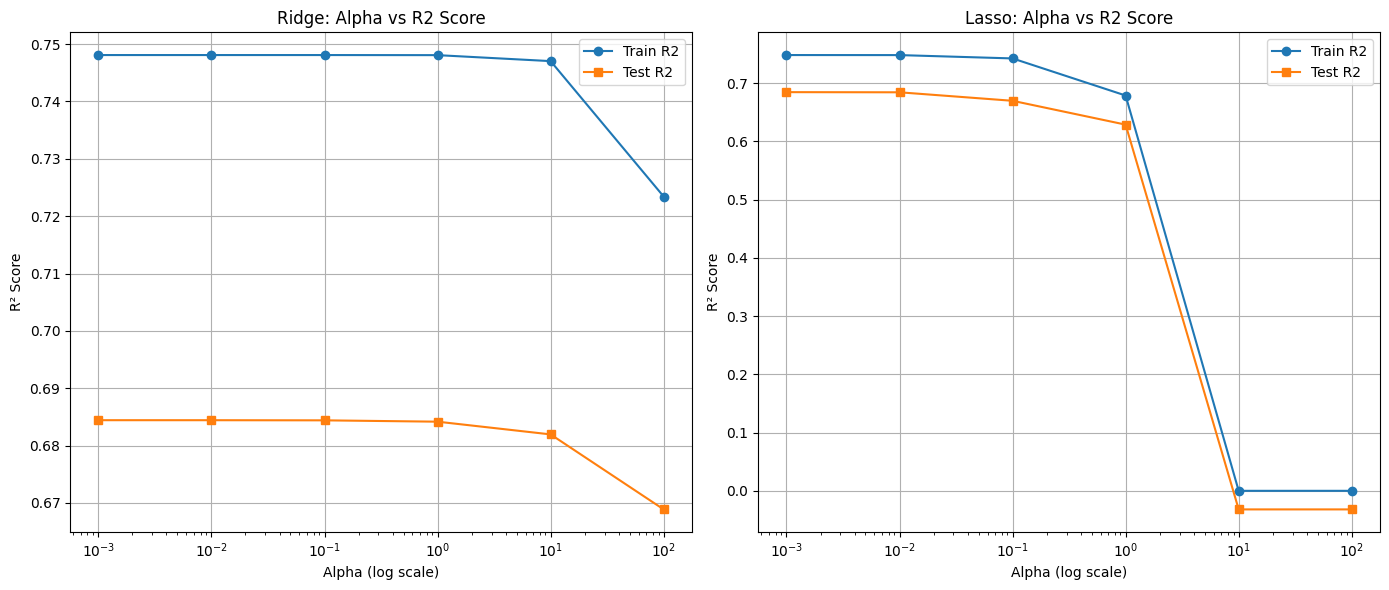

In [ ]:
# aplha값에 따른 과소적합,최적,과대적합 확인
ridge_df = results_df[results_df["Model"] == "Ridge"]
lasso_df = results_df[results_df["Model"] == "Lasso"]
plt.figure(figsize=(14, 6))

# Ridge
plt.subplot(1, 2, 1)
plt.plot(ridge_df["Alpha"], ridge_df["Train R2"], marker='o', label="Train R2")
plt.plot(ridge_df["Alpha"], ridge_df["Test R2"], marker='s', label="Test R2")
plt.xscale("log") # alpha값 로그 스케일로
plt.title("Ridge: Alpha vs R2 Score")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)

# Lasso
plt.subplot(1, 2, 2)
plt.plot(lasso_df["Alpha"], lasso_df["Train R2"], marker='o', label="Train R2")
plt.plot(lasso_df["Alpha"], lasso_df["Test R2"], marker='s', label="Test R2")
plt.xscale("log")
plt.title("Lasso: Alpha vs R2 Score")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Ridge와 Lasso 그래프 모두에서 alpha 값이 작을 때는 과대적합 경향을 보이고
# alpha값이 클수록 점차 과소적합으로 전환된다.
# 따라서 가장 적절한 alpha값은 과소적합되기 직전 구간으로, 일반화 성능(Test R2)이 최고점을 기록한 지점이다.
# 즉 Ridge에서는 alpha=1이 Lasso에서는 alpha=0.01이 최적인 구간이다.

# +) Train R2가 작아지기 시작하는 시점에서 Test R2가 최대를 기록하는 구간이 최적의 alpha값이 된다.

In [ ]:
# Lasso에서 최적의 alpha값은 0.01이고 Lassp(alpha=0.01)학습 후 결과에 가장 많은 영향 피처 3가지

# lasso 학습
best_lasso = Lasso(alpha=0.01, max_iter=10000)
best_lasso.fit(x_train_scaled, y_train) # 학습

# 계수 추출 및 절대값 기준 정렬
coef_series = pd.Series(abs(best_lasso.coef_), index=x.columns)
top3_features = coef_series.sort_values(ascending=False).head(3)

# 출력
print("Lasso에서 가장 영향력 있는 특성 3개:")
print(top3_features)

Lasso에서 가장 영향력 있는 특성 3개:
lstat    3.695651
rm       3.145861
dis      2.886521
dtype: float64


In [ ]:
# Lasso는 불필요한 특성의 계수를 0으로 만들어 자동으로 특성 기능을 수행한다
# 계수의 절대값이 클수록 그 특성이 타겟값에 미치는 영향이 크다
# 출력된 3개: lstat(저소득층 비율), rm(주택 1채당 평균 방 개수), dis(5개 주요 고용센터까지 거리)이 가장 영향력 있는 특성이다.

In [ ]:
# 실제 부호가 포함된 계수
real_coef_series = pd.Series(best_lasso.coef_, index=x.columns)

# top3 특성의 부호 확인
top3_signed = real_coef_series[top3_features.index]

print("\n해당 특성들의 계수 (부호 포함):")
print(top3_signed)


해당 특성들의 계수 (부호 포함):
lstat   -3.695651
rm       3.145861
dis     -2.886521
dtype: float64


In [ ]:
# lstat은 음의 상관관계로 저소득층 비율이 높을수록 집값 하락이고
# rm은 양의 상관관계로 방 개수가 많을수록 집값 상승이고
# dis은 음의 상관관계로 고용 중심지까지의 거리가 멀수록 집값 하락이다.

In [ ]:
# 즉 Lasso 모델에서 가장 영향력 있는 특성은 lstat, rm, dis이고,
# lstat과 dis는 음의 계수를 보여, 각각 저소득층 비율이 높을수록 그리고 고용지까지 거리가 멀수록 집값이 낮아지는 경향을 보였다.
# 반면 rm은 양의 계수를 보여, 주택 내 방 개수가 많을수록 집값이 상승하는 경향을 나타냈다.
# 이로써 해당 특성들이 주택 가격 결정에 핵심적인 영향을 미친다는 것을 확인할 수 있었다.